# <center> <font size = 24 color = 'steelblue'> **Feature Extraction - Audio-emotions**

<div class="alert alert-block alert-info">
    
<font size = 4>

**By the end of this notebook you will be able to:**
- Understand techniques for extracting useful features from audio.
- Explore the Mel-frequency cepstral coefficient

# <a id= 'f0'>
<font size = 4>
    
**Table of Contents:**<br>
[1. Introduction](#f1)<br>
[2. MFCC](#f2)<br>
[3. Deepdive](#f3)<br>
[4. Statistical features](#f4)<br>
[5. Take aways](#f5)

##### <a id = 'f1'>
<font size = 10 color = 'midnightblue'> **Introduction**

<div class="alert alert-block alert-success">
<font size = 4>

Broadly speaking, there are two categories of features:

**- Time domain features**<br>
> These are simpler to extract and understand, such as the energy of the signal, zero-crossing rate, maximum amplitude, minimum energy, etc.

**- Frequency-based features**<br>
> These are obtained by converting the time-based signal into the frequency domain.
> While they are harder to comprehend, extra information, such as pitch, rhythms, melody, etc., can be provided.
> Check the infographic below:

# <center> <img src = "https://www.nti-audio.com/portals/0/pic/news/FFT-Time-Frequency-View-540.png">

<font size = 2>
    
<b>The time vs frequency domain image sourced from __[here](https://www.nti-audio.com/en/support/know-how/fast-fourier-transform-fft)__</b>

</div>

<div class="alert alert-block alert-info">
<font size = 4>
    
**Note about the data used:**
- The data used here is the `Ryerson Audio-Visual Database of Emotional Speech and Song or RAVDESS`.
- The section of data used here comprises **1440 files**, resulting from **60 trials per actor multiplied by 24 actors**.
- The RAVDESS features 24 professional actors, evenly divided between 12 females and 12 males.
- These actors vocalize two lexically-matched statements in a neutral North American accent.
- Speech emotions included in the dataset encompass calm, happy, sad, angry, fearful, surprise, and disgust expressions.
- Each expression is generated at two levels of emotional intensity, namely normal and strong, with an additional neutral expression.
</div>

[top](#f0)

##### <a id = 'f2'>
<font size = 10 color = 'midnightblue'>**MFCC: Mel-frequency cepstral coefficient**

<div class="alert alert-block alert-success">
<font size = 4>
    

- MFCC, or Mel-frequency cepstral coefficient, is a significant representation of the sound-producing vocal tract.
- In the Mel-scale, pitch distinctions are perceived equally, aligning with human auditory preferences.
- Derived from a sound's short-term power spectrum in Mel-scale, MFCCs are commonly used in speech recognition for capturing distinct voice frequencies.
- In machine learning, a prevalent approach is to treat MFCC as an 'image' and utilize it as a feature, enabling transfer learning for enhanced information.
- While effective, research suggests that statistics from MFCCs or other domains can also contain substantial information. Both methods will be explored.

<div class="alert alert-block alert-info">
<font size = 4>

<b>Check</b> [this article](https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd) <b>to learn more about MFCC.</b>

[top](#p0)

<font size = 6 color = seagreen> **Load neccessary libraries**

In [1]:
# Import our libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook

[top](#f0)

##### <a id = 'f3'>
<font size = 10 color = 'midnightblue'>**Deepdive**

<div class="alert alert-block alert-success">
<font size = 4>
    
- Choose specific instances for MFCC visualization.
- Select two distinct emotions and genders for assessment, playing the chosen instances to evaluate audio data quality.
- This initial evaluation provides insights into the potential success of the classifier.
</div>

In [ ]:
#pwd()

In [2]:
!pip3 install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.5 MB/s eta 0:00:00


In [3]:
from zipfile import ZipFile

with ZipFile('ravdess-emotional-speech-audio.zip', 'r') as f:
    f.extractall()

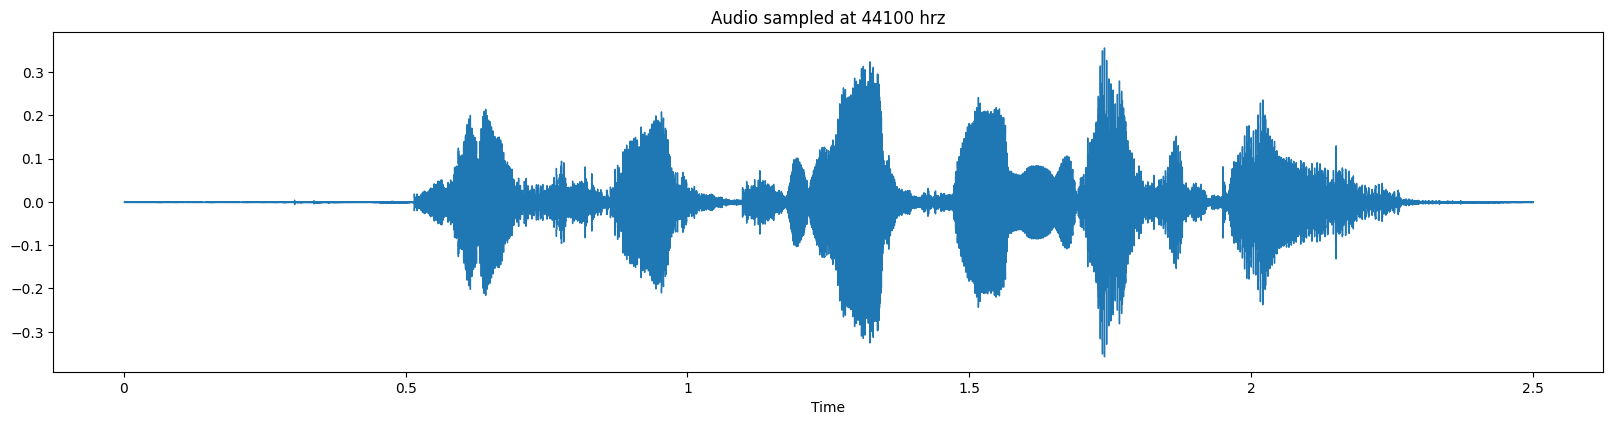

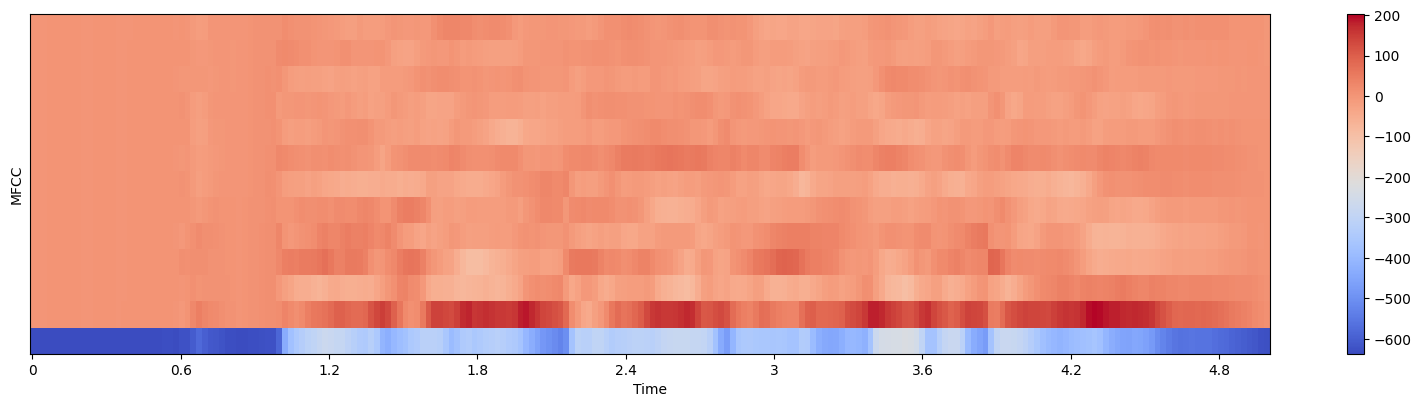

In [4]:
# Source - RAVDESS; Gender - Female; Emotion - Angry
path = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

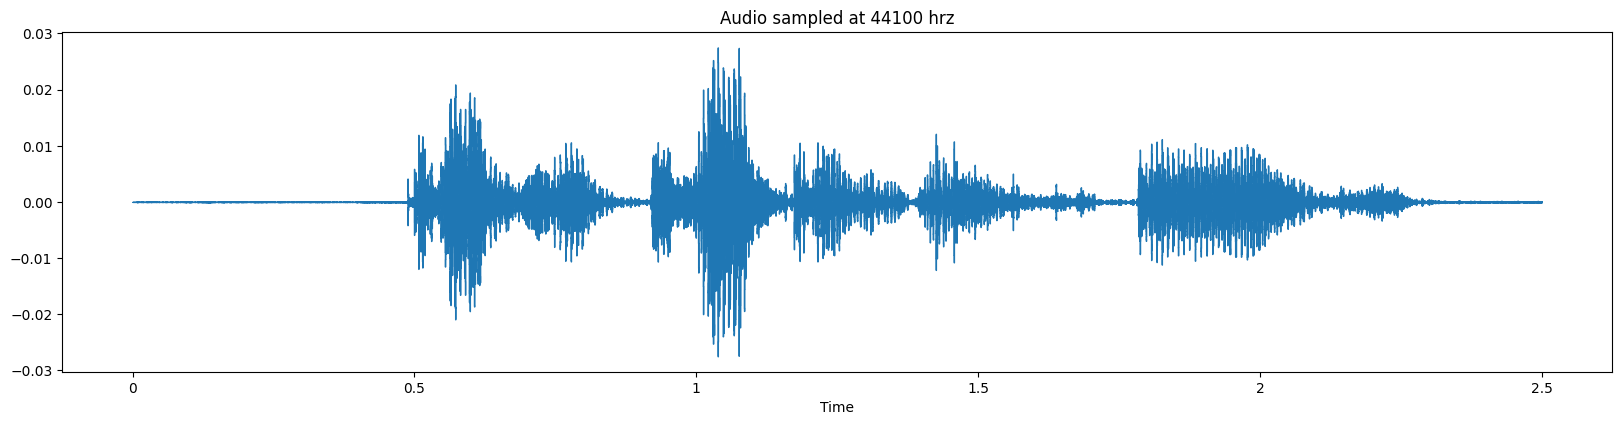

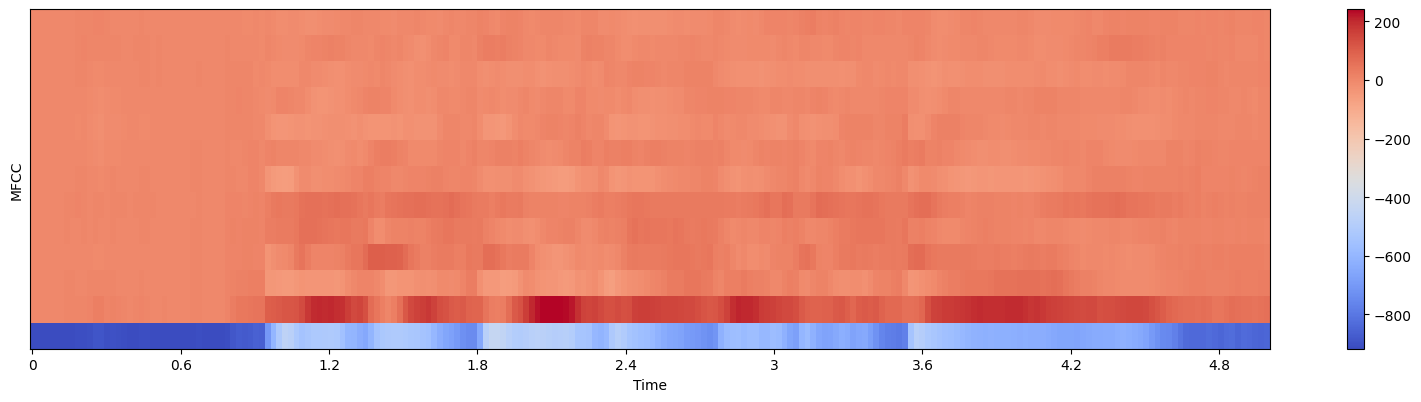

In [5]:
# Source - RAVDESS; Gender - Male; Emotion - Angry
path = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

<div class="alert alert-block alert-success">
<font size = 4>
<center> <b>The male counterpart responded very calmly....<b>

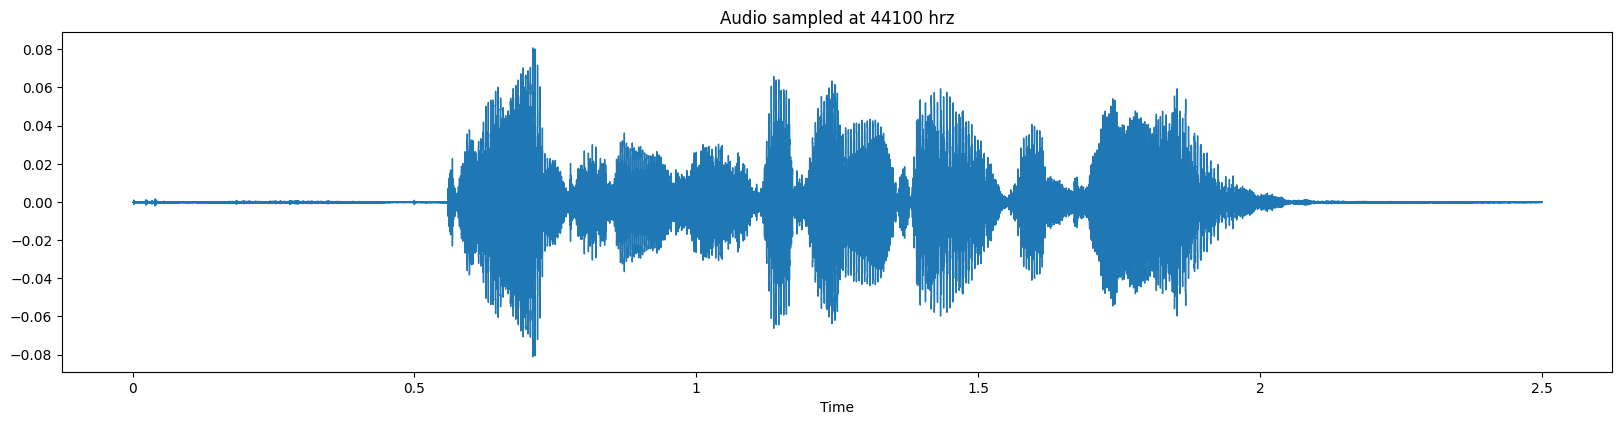

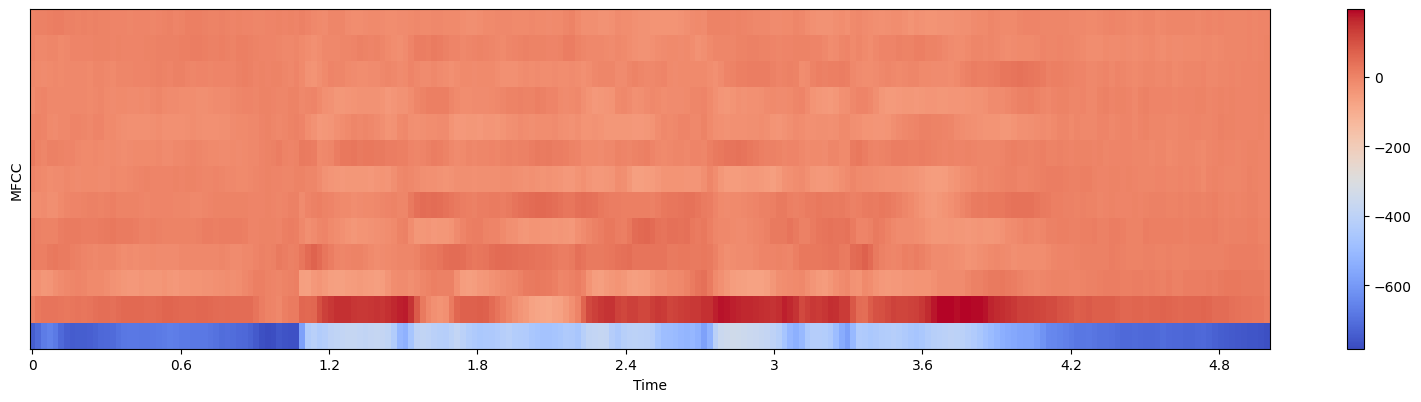

In [6]:
# Source - RAVDESS; Gender - Female; Emotion - Happy
path = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

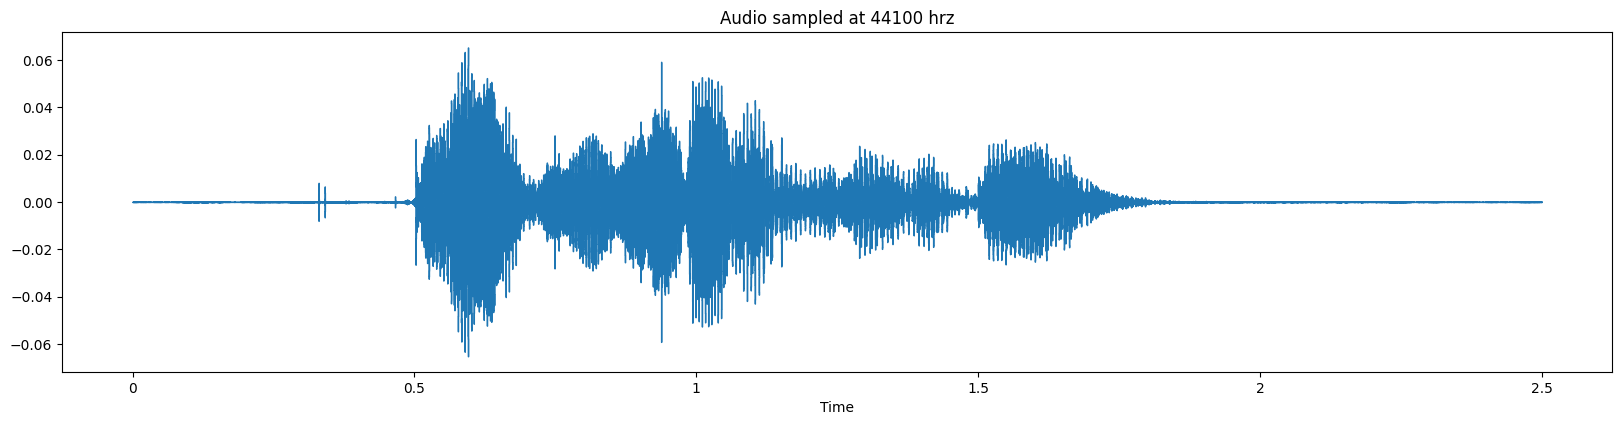

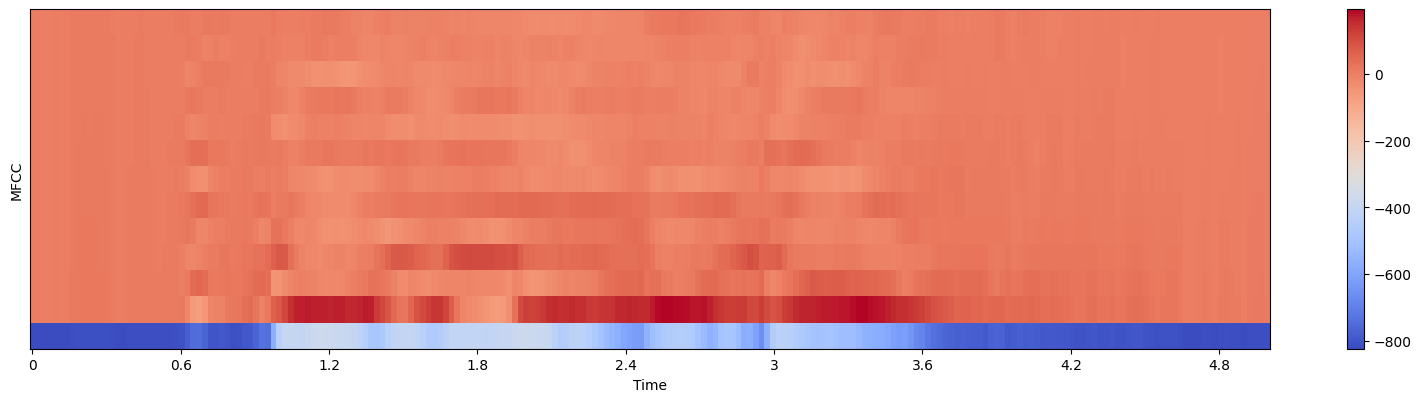

In [7]:
# Source - RAVDESS; Gender - Male; Emotion - Happy
path = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

[top](#f0)

##### <a id = 'f4'>
<font size = 10 color = 'midnightblue'>**Statistical features**

<div class="alert alert-block alert-success">
<font size = 4>

- Having examined the MFCC output in the format of a 2D matrix with bands on the y-axis and time on the x-axis, we will simplify by calculating mean values across each band over time (i.e., row means).
- The most distinctive feature is noticeable in the first band at the bottom of the MFCC plot, where observed changes over time are minimal due to the short time window.
- The crucial aspect is capturing information across bands, illustrated by plotting the mean of each band as a time series.
- A comparison will be conducted between Angry female and Angry male for the same uttered sentence.
</div>

216
216


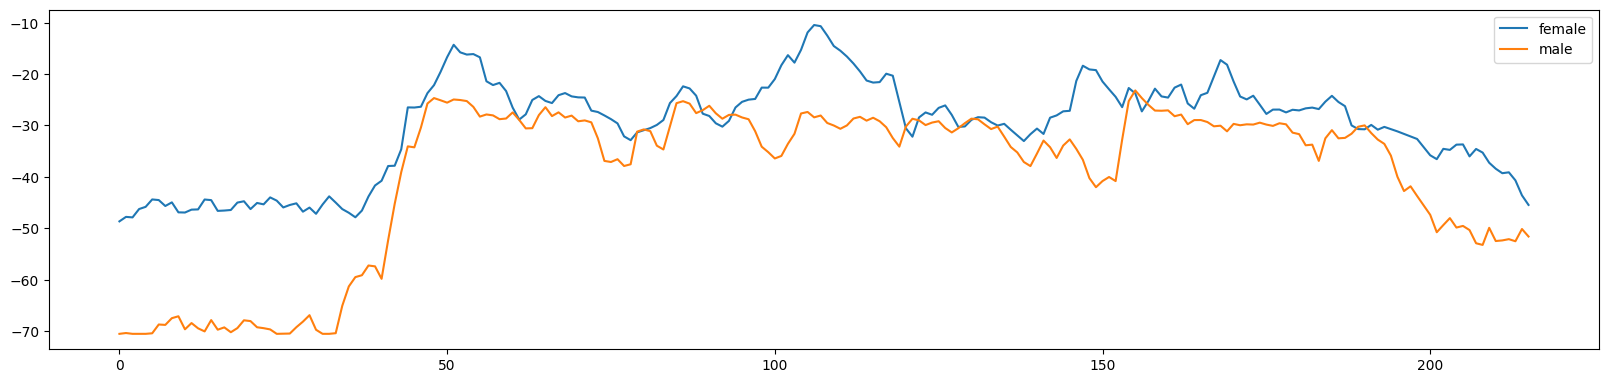

In [8]:
# Source - RAVDESS; Gender - Female; Emotion - Angry
path = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry
path = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

<div class="alert alert-block alert-success">
<font size = 4>
When the same sentence is spoken, a noticeable distinction between male and female voices emerges, with females generally having a higher pitch.
</div>
    

<font size = 6 color = seagreen><center> <b>Let's explore further:<br>

<font size = 6 color = seagreen> <center> <b>Compare a <b><font color = 'gray'> Happy Female</b> and a <font color = 'gray'><b>Happy Male</b>.


216
216


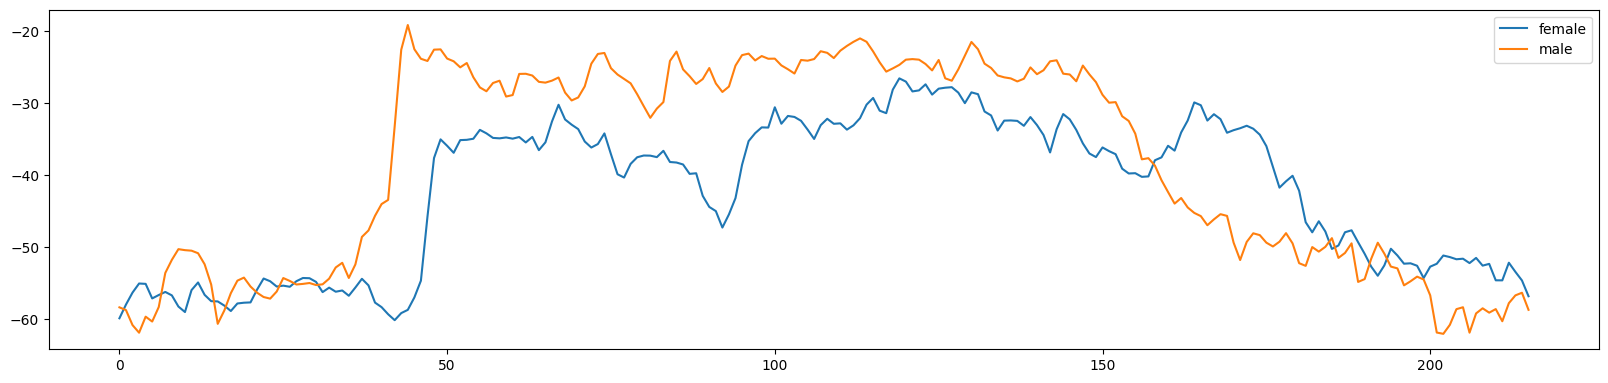

In [9]:
# Source - RAVDESS; Gender - Female; Emotion - happy
path = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy
path = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

[top](#f0)

##### <a id = 'f4'>
<font size = 10 color = 'midnightblue'>**Take Aways**

<div class="alert alert-block alert-success">
<font size = 4>
    
- As demonstrated earlier, the utilization of MFCC is effective in distinguishing gender and emotions.
- Despite the omission of substantial information by focusing only on the mean, it seems we capture enough to discern differences.
- The exploration of whether these differences are significant for distinguishing various emotions will be undertaken in the next section, where we will establish a baseline emotion classifier.

[top](#f0)